# Operational Pipeline (**AutoScale**)

### Before running this script,
- For two smaller training data scales $N^{(1)}$ and $N^{(2)}$ where re-training the model is affordable, find their corresponding optimal training data compositions $\mathbf{N^{(1)*}}$ and $\mathbf{N^{(2)*}}$ using **DDO** Algorithm described in the other script.

### In this script,
- Enter the optimized domain weights $\mathbf{N^{(1)*}}$, $\mathbf{N^{(2)*}}$ from the experiments listed above;
- Predict the next optimal training data composition as $\mathbf{N^{(3)*}}=\mathbf{N^{(2)*}}(\mathbf{N^{(1)*}})^{-1}\mathbf{N^{(2)*}}$, yielding optimal domain weights $w_i^{(3)*}=N_i^{(3)*}/N^{(3)}$ at new training data scale $N^{(3)}=\sum_i N_i^{(3)*}$;
- Repeat this process until the target training data scale is reached.


In [2]:
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
import numpy as np
import pandas as pd

## ## Enter optimized domain data quantity for training a GPT-2-Large with 0.3B tokens (n03) and 1.2B tokens (n12).

In [29]:
n03 = np.array([1.55818971, 0.2       , 1.1645966 , 1.42333261, 1.49550525,
       0.68184781, 0.47652801])/7*0.3
n03,np.sum(n03)

(array([0.06677956, 0.00857143, 0.04991128, 0.06099997, 0.06409308,
        0.02922205, 0.02042263]),
 0.29999999957142864)

In [30]:
n12 = np.array([1.63121445, 0.2, 1.30180479, 1.21425702, 1.83266187,
       0.62006189, 0.2])/7*1.2
n12,np.sum(n12)

(array([0.27963676, 0.03428571, 0.22316654, 0.20815835, 0.31417061,
        0.10629632, 0.03428571]),
 1.2000000034285714)

## Predicting optimal domain data quantity for the next scale

In [31]:
nnext = n12*(n12/n03)
nnext,np.sum(nnext)

(array([1.17096789, 0.13714286, 0.99783655, 0.71032654, 1.53999724,
        0.38665696, 0.0575592 ]),
 5.000487243200733)

## which gives the optimal domain data quantity for 5B training tokens. Repeating this process...

In [32]:
nnext2 = n12*(n12/n03)*(n12/n03)
nnext2,np.sum(nnext2)

(array([4.90338173, 0.54857143, 4.46159093, 2.42394219, 7.54873774,
        1.4064795 , 0.09663096]),
 21.38933448443632)

In [33]:
nnext3 = n12*(n12/n03)*(n12/n03)*(n12/n03)
nnext3,np.sum(nnext3)

(array([20.53271711,  2.19428571, 19.94895209,  8.27154188, 37.0023009 ,
         5.11612314,  0.16222503]),
 93.22814586841008)

In [34]:
nnext4 = n12*(n12/n03)*(n12/n03)*(n12/n03)*(n12/n03)
nnext4,np.sum(nnext4)

(array([ 85.97994105,   8.77714286,  89.19703657,  28.22608777,
        181.3773799 ,  18.61009415,   0.27234501]),
 412.44002730550164)

## *nnext4* gives the optimal domain data quantity for 412B training tokens. Visualize the results

In [35]:
xs=np.log([np.sum(nnext),np.sum(nnext2),np.sum(nnext3),np.sum(nnext4)])

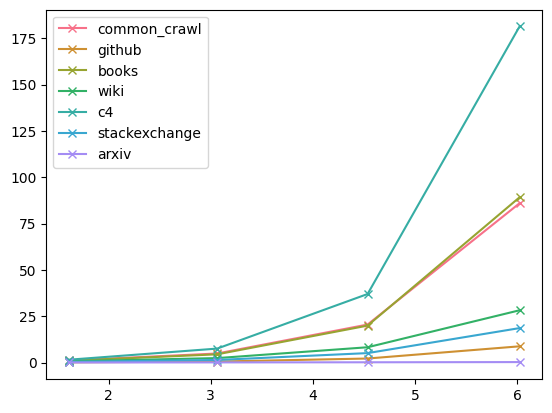

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Choose a Seaborn color palette

custom_palette = sns.color_palette("husl", 8)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_palette)


plt.plot(xs,np.array([nnext,nnext2,nnext3,nnext4]),'x-',label=['common_crawl','github','books','wiki','c4','stackexchange','arxiv'])
plt.legend()

## Translating the above results to domain weights

### (x-axis in log-scale; left two dots are results used to fit AutoScale, 'x' on the right are predicted domain weights for larger scales)

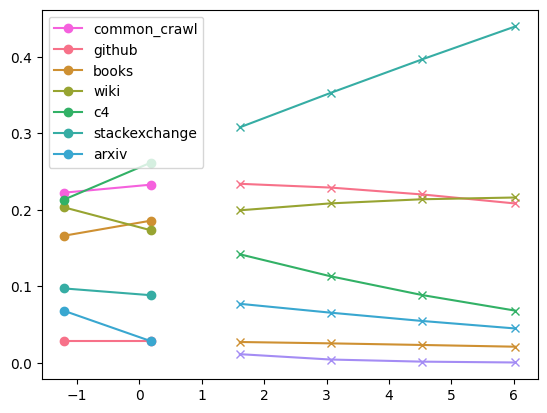

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Choose a Seaborn color palette
custom_palette = sns.color_palette("husl", 8)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_palette)


plt.plot(xs,np.array([nnext/np.sum(nnext),nnext2/np.sum(nnext2),nnext3/np.sum(nnext3),nnext4/np.sum(nnext4)]),'x-')

# Choose a Seaborn color palette
custom_palette = sns.color_palette("husl", 8)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_palette)

plt.plot(np.log([np.sum(n03),np.sum(n12)]),np.array([n03/np.sum(n03),n12/np.sum(n12)]),'o-',label=['common_crawl','github','books','wiki','c4','stackexchange','arxiv'])
plt.legend()

## Indepedent validation

### Predicting optimal domain data quantity for 0.6B training tokens from DDO results obtained at 0.3B and 1.2B training tokens: comparison with DDO results obtained independently at 0.6B training tokens.

In [51]:
n06 = np.array([1.6537299 , 0.2       , 1.1988018 , 1.27792191, 1.62120831,
       0.7912898 , 0.25704828])/7*0.6
n06,np.sum(n06)

(array([0.14174828, 0.01714286, 0.10275444, 0.10953616, 0.13896071,
        0.06782484, 0.02203271]),
 0.6000000000000001)

In [54]:
n06pred = np.sqrt(n12/n03)*n03
n06pred, np.sum(n06pred)

(array([0.13665292, 0.01714286, 0.10553923, 0.11268386, 0.14190195,
        0.05573326, 0.02646138]),
 0.5961154447891214)

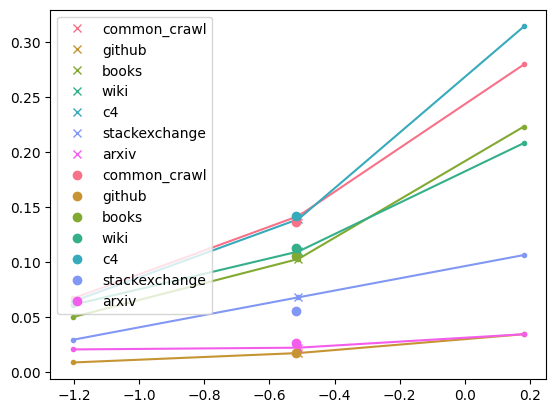

In [62]:
# Choose a Seaborn color palette
custom_palette = sns.color_palette("husl", 7)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_palette)

plt.plot(np.log([np.sum(n03),np.sum(n06),np.sum(n12)]),np.array([n03,n06,n12]),'.-')

# Choose a Seaborn color palette
custom_palette = sns.color_palette("husl", 7)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_palette)


plt.plot(np.log([np.sum(n06)]),[n06],'x',label=['common_crawl','github','books','wiki','c4','stackexchange','arxiv'])


# Choose a Seaborn color palette
custom_palette = sns.color_palette("husl", 7)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_palette)


plt.plot(np.log([np.sum(n06pred)]),[n06pred],'o',label=['common_crawl','github','books','wiki','c4','stackexchange','arxiv'])

plt.legend()

### 'x denote optimial domain data quantity predicted by AutoScale and dots 'o' denote otimial domain data quantity obtained independently with DDO algorithm.

## It can be seen that the difference is minimal, showing a high prediction accuracy of AutoScale.